<a href="https://colab.research.google.com/github/Azeezhamzat/My-DS-Journey-Begins/blob/main/Introduction_to_Python_Bootcamp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Azeez Adewale HAMZAT_Bootcamp project submission
Aug 24,2021

# Introduction to the Project

You are a machine learning consultant and you have been handed a dataset to perform Exploratory Data Analysis (EDA) in preparation to use the dataset to build a classfication machine learning model. 

The dataset is the report of a census. The dataset has the following headings:
- Age
- Workclass
- Education
- Marital Status
- Occupation
- Relationship
- Race
- Sex
- Capital Gain
- Capital Loss
- Hours per week
- Native country
- Class (Income Class)

The dataset is to be fed into a classification algorithm (income class prediction) i.e. by analysing all the features in the dataset (e.g. age, workclass, education, marital status, etc), the algorithm can attempt to predict the income class the individual belongs to. Perform the tasks as stated below. 

## Task 1 - Import the necessary libraries

In [73]:
# import numpy as np, pandas as pd, matplotlib.pyplot as plt and any other library you thnk you would need
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [74]:
import warnings
warnings.filterwarnings('ignore')

## Task 2 - Import the census dataset

In [75]:
# import the census dataset which was sent you in CSV form here. Name the variable 'census_df'
census_df = pd.read_csv('/adult_census_report.csv')
census_df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,HS-grad,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Task 3 - Assess the dataset for understanding

Write python code that provides answers the following questions: 

- How many observations are in the census dataset?
- How many people are in income class "<=50k"?
- How many cells in the data are invalid for processing i.e. they have 'null or NaN' values?
- What are the number of males and females in the dataset?

In [76]:
census_df.shape

(48842, 13)

### The datasest contain 48,842 rows and 13 columns

In [77]:
census_df['class'].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

### There are 37155  people in income class "<=50K"

In [78]:
census_df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### There is no missing value, but there are obviously some '?' within the dataset. 
### These '?' are invalid for processing.
### We have to either remove or replace the with valid figures

In [79]:
#To figure the total numbers of the '?' so that we can know what decision to make
for feature in census_df.columns:
    print('------','Column name:',feature,'------')
    print(census_df[feature].unique())
    print('--------end---------')
    print(' ')

------ Column name: age ------
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
--------end---------
 
------ Column name: workclass ------
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------end---------
 
------ Column name: education ------
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
--------end---------
 
------ Column name: marital-status ------
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
--------end---------
 
------ Column name: occupation ------
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv

In [80]:
census_df['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

### There are 2799 invalid (?) data within the workclass

In [81]:
census_df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [82]:
census_df['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

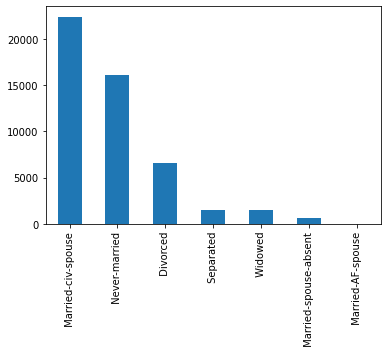

In [83]:
census_df['marital-status'].value_counts().plot(kind='bar');

In [84]:
census_df['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 

### There are 857 invalid (?) data within the native country category

In [85]:
#To check for the total number of males and females
census_df['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

### There are 32650 males, and 16192 females in the dataset.

## Task 4 - Handle missing values

There are two popular ways to handle missing values: delete them, or imput them (e.g. replacing the missing values with mean, median or mode of the feature in the dataset. What is the best way to handle the missing values in the dataset? Write python code that implements your preferred choice of handling missing values. 

In [86]:
#Checking for the datatypes of the columns with invalid data
census_df.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

#### We have invalid data in the workclass, occupation, and native-country. They all happen to be object type.
#### The number of the invalid data is in thousands hence we cannot not delete them otherwise we will lose a great amount of information.
#### Here, we can only consider replacing them with their mode values.

#### Replacing the invalid data with their respective mode values

In [87]:
#Checking for the mode of the workclass category
census_df['workclass'].mode()

0     Private
dtype: object

In [88]:
#Replace the values with mode
census_df['workclass'] = census_df['workclass'].str.replace('?', 'Private')

#### The mode replacement did not take effect on the dataset until I added the 'str'

In [89]:
#Checking for the mode of the occupation category
census_df['occupation'].mode()

0     Prof-specialty
dtype: object

In [90]:
#Replace the values with mode
census_df['occupation'] = census_df['occupation'].str.replace('?', 'Prof-specialty')

In [91]:
#Checking for the mode of the native-country
census_df['native-country'].mode()

0     United-States
dtype: object

In [92]:
#Replace the values with mode
census_df['native-country'] = census_df['native-country'].str.replace('?', 'United-States')

In [93]:
census_df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Task 5 - Plotting the dataset

Write a python code that shows the following charts:
(a) A bar chart showing the distribution of respondents according to sex, education and native country.

In [94]:
#Reconfiguring the education category for easy visualization
census_df.education = census_df.education.replace(['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'],
                                                  'Primary school', regex=True)
census_df.education = census_df.education.replace('HS-grad', 'high school', regex=True)
census_df.education = census_df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher', regex=True)
census_df.education = census_df.education.replace('Bachelors', 'undergrade', regex=True)
census_df.education = census_df.education.replace('Masters', 'grad', regex=True)
census_df.education = census_df.education.replace('Doctorate', 'doc', regex=True)

In [95]:
#Reconfiguring the  marital status for easy visualization
census_df['marital-status']= census_df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married', regex=True)
census_df['marital-status']= census_df['marital-status'].replace('Never-married', 'not-married', regex=True)
census_df['marital-status'] =census_df['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'others', regex=True)


In [96]:
#Reconfiguring the  native-country category for easy visualization

census_df['native-country'] = census_df['native-country'].replace('United-States', 'US', regex=True)

census_df['native-country'] = census_df['native-country'].replace(['Mexico', 'Puerto-Rico', 
                                                                   'Canada', 'El-Salvador','Cuba', 'Jamaica', 
                                                                   'Dominican-Republic', 'Guatemala', 'Columbia', 'Haiti',
                                                                   'Nicaragua','Peru','Honduras'], 'North America', regex=True)

census_df['native-country'] = census_df['native-country'].replace(['Philippines', 'India', 'China', 
                                                                   'Japan','Vietnam', 'Taiwan', 'Iran','Hong','Thailand',
                                                                   'Cambodia','Laos'],'Asia', regex=True)

census_df['native-country'] = census_df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland','Portugal', 
                                                                   'Greece', 'France','Ireland','Yugoslavia', 'Scotland','Hungary',
                                                                   'Holand-Netherlands'],'Europe', regex=True)

census_df['native-country'] = census_df['native-country'].replace([ 'South','Ecuador', 'Trinadad&Tobago'],'South America', regex=True)
census_df['native-country'] = census_df['native-country'].replace(['Outlying-US(Guam-USVI-etc)'],'other', regex=True)

In [97]:
census_df['native-country'].value_counts()

 US                            44689
 North America                  2182
 Asia                            981
 Europe                          780
 South America                   187
 Outlying-US(Guam-USVI-etc)       23
Name: native-country, dtype: int64

In [98]:
# census_df.columns
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
 12  class           48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


Tried many methods before finding the best viz

[Link to Seaborn Plotting Below](https://seaborn.pydata.org/tutorial/categorical.html)

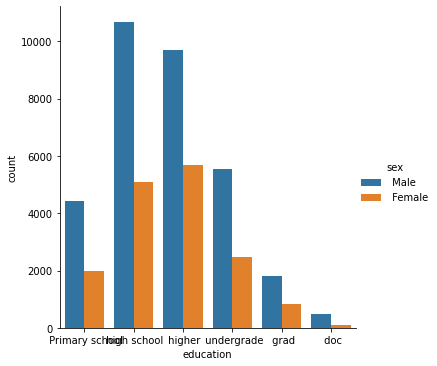

In [106]:
#Plotting the sex vs education category
# sns.barplot(data=census_df['sex'].value_counts());  # x = 'sex', y = 'education', 
# sns.barplot(x=census_df['sex'].values, y=census_df['education'].values);  # x = 'sex', y = 'education', 
# census_df['sex_num'] = census_df['sex'].str.replace('Male', 'male')
# census_df['sex_num'] = census_df['sex_num'].str.replace('Female', 'female')
# {'Male': 0, 'Female': 1})
# sns.catplot(x="sex", y="education", kind="bar", data=census_df)
# census['sex_num'] = census.sex.apply(lambda x: 1 if x=='Male" else 0)
# census_df['sex'][census_df['sex'] == 'Male'].value_counts()
sns.catplot(x="education", hue="sex", kind="count", data=census_df);

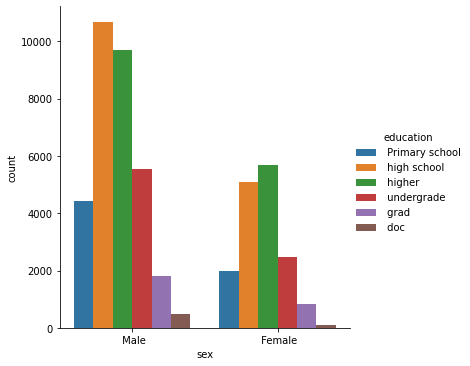

In [107]:
sns.catplot(x="sex", hue="education", kind="count", data=census_df);

In [101]:
census_df['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

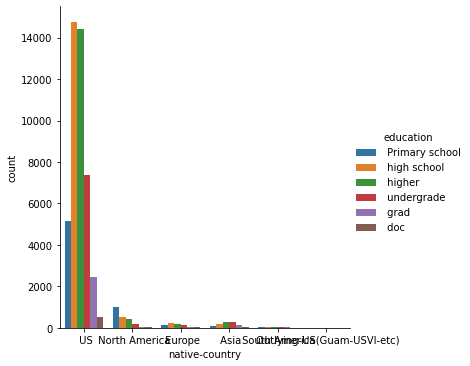

In [108]:
# Plotting the education vs native-country category
sns.catplot(x="native-country", hue="education", kind="count", data=census_df)

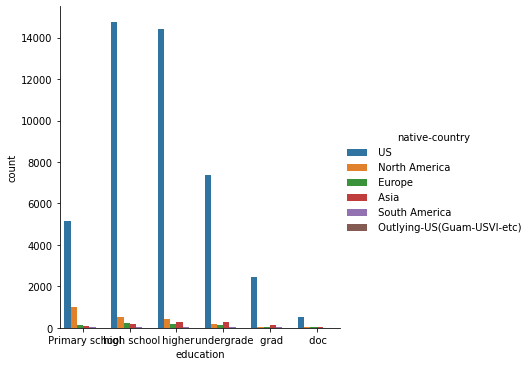

In [103]:
sns.catplot(x="education", hue="native-country", kind="count", data=census_df)

This one looks better

## Task 6 - Save your updated census dataset in a new CSV file

Write a python code that saves your work in a CSV file named "census_new". 

In [104]:
census_df.to_csv('census_new.csv')

In [105]:
pd.read_csv('census_new.csv')

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,Primary school,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,US,<=50K
1,1,38,Private,high school,married,Farming-fishing,Husband,White,Male,0,0,50,US,<=50K
2,2,28,Local-gov,higher,married,Protective-serv,Husband,White,Male,0,0,40,US,>50K
3,3,44,Private,higher,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,US,>50K
4,4,18,Private,higher,not-married,Prof-specialty,Own-child,White,Female,0,0,30,US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,higher,married,Tech-support,Wife,White,Female,0,0,38,US,<=50K
48838,48838,40,Private,high school,married,Machine-op-inspct,Husband,White,Male,0,0,40,US,>50K
48839,48839,58,Private,high school,others,Adm-clerical,Unmarried,White,Female,0,0,40,US,<=50K
48840,48840,22,Private,high school,not-married,Adm-clerical,Own-child,White,Male,0,0,20,US,<=50K
